<a href="https://colab.research.google.com/github/mshumko/DASP_2024/blob/main/2024_dasp_asilib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024 DASP Student Workshop on aurora-asi-lib (asilib)

Some useful links:
- [Docs](https://aurora-asi-lib.readthedocs.io/en/latest/index.html)
- [GitHub](http://github.com/mshumko/aurora-asi-lib)

## Setup

Since we're running on Google Colab, we will need to install asilib. Also, to speed things up, we will point the asilib data directory to Mike's Google Drive folder that already contains the TREx data. Therefore, you normally won't need this code.

First take the asilib-data Shared Google Drive folder and make a shortcut in your personal Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Verify that the below ls command returns the trex/ folder.

In [2]:
!ls "/content/drive/My Drive/asilib-data/"

rego  themis  trex


In [3]:
%%capture
!python -m pip install aurora-asi-lib

In [4]:
!yes /content/drive/My Drive/asilib-data/ | python -m asilib config

Running the configuration script.
What is the aurora data directory? Press enter for the default directory at ~/asilib-data folder will be created.
aurora_asi data directory at /content/drive/My Drive/asilib-data already exists.


In [5]:
import pathlib

import matplotlib.pyplot as plt
import matplotlib.dates

import asilib
import asilib.asi
import asilib.map

In [6]:
print(f'asilib version: {asilib.__version__}')
print(asilib.config['ASI_DATA_DIR'])

asilib version: 0.20.5
/content/drive/My Drive/asilib-data


## A substorm on 24 February 2023

We will use Univeristy of Calgary's Transition Region Explorer (TREx) imafers to look at the sudden brightning of the aurora during a substorm. Before we do that, here is a list of the TREx imager names and approximate locations.

In [16]:
asilib.asi.trex_rgb_info()

,array,location_code,name,latitude,longitude
0,TREx_RGB,ATHA,Athabasca,54.60,-113.64
1,TREx_RGB,FSMI,Fort Smith,60.03,-111.93
2,TREx_RGB,GILL,Gillam,56.38,-94.64
3,TREx_RGB,LUCK,Lucky Lake,51.15,-107.26
4,TREx_RGB,PINA,Pinawa,50.26,-95.87
5,TREx_RGB,RABB,Rabbit Lake,58.23,-103.68


Let's first plot one of the fisheye lens and mapped images from a TREx imager in Rabbit Lake (RABB)

(-0.5, 552.5, -0.5, 479.5)

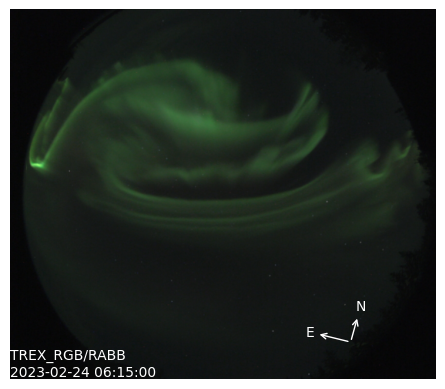

In [13]:
time = '2023-02-24T06:15'

asi = asilib.asi.trex_rgb('RABB', time=time)
asi.plot_fisheye()
plt.axis('off');

<<< Comment on the image >>>

Now plot the image from the same time, but taken at Fort Smith (FSMI)

Now lets get a broader picture using a [keogram](https://en.wikipedia.org/wiki/Keogram): a plot that summarizes a series of auroral images, taken over time. Keograms are assembled by taking a slice of pixels through each image, iterating over all of the images, and assembling the slices into a new image.

Keograms are essential tools for auroral physists as they summarize hours worth of auroral data into a single plot. The distinct signatures in a keogram help us discern different types of aurora and seeing conditions.